In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
yes_bank = pd.read_csv('YesBank_StockPrices.csv')
yes_bank

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [274]:
yes_bank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [275]:
yes_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [276]:
yes_bank.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [277]:
from datetime import datetime

yes_bank['Date'] = yes_bank['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))
yes_bank.set_index('Date', inplace=True)

<AxesSubplot: xlabel='Date'>

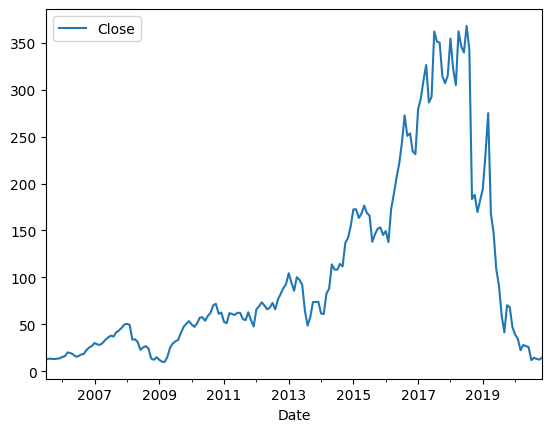

In [278]:
yes_bank.plot.line(y='Close')

In [279]:
new_yes_bank = yes_bank.copy()

yes_bank['OHL'] = yes_bank[['Open', 'High', 'Low']].mean(axis=1).round(2)

for i in range(1,7):
    yes_bank[f'Lag_{i}'] = yes_bank['OHL'].shift(i)

yes_bank

,Open,High,Low,Close,OHL,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6
Date,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,12.58,14.88,12.55,13.42,13.34,12.75,NaN,NaN,NaN,NaN,NaN
2005-09-01,13.48,14.87,12.27,13.30,13.54,13.34,12.75,NaN,NaN,NaN,NaN
2005-10-01,13.20,14.47,12.40,12.99,13.36,13.54,13.34,12.75,NaN,NaN,NaN
2005-11-01,13.35,13.88,12.88,13.41,13.37,13.36,13.54,13.34,12.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95,21.67,28.42,28.20,24.35,42.90,37.80,43.98
2020-08-01,12.00,17.16,11.85,14.37,13.67,21.67,28.42,28.20,24.35,42.90,37.80
2020-09-01,14.30,15.34,12.75,13.15,14.13,13.67,21.67,28.42,28.20,24.35,42.90


<AxesSubplot: >

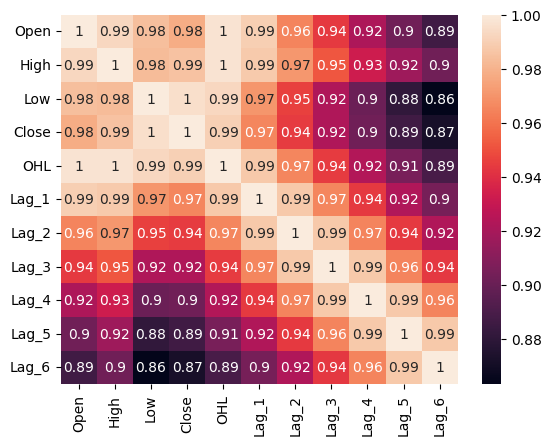

In [280]:
sns.heatmap(yes_bank.corr(), annot=True)

In [281]:
yes_bank['Next Month'] = yes_bank['Close'].shift(-1)
yes_bank['Target'] = (yes_bank['Next Month'] > yes_bank['Close']).astype(int)
yes_bank

,Open,High,Low,Close,OHL,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Next Month,Target
Date,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75,NaN,NaN,NaN,NaN,NaN,NaN,13.42,1
2005-08-01,12.58,14.88,12.55,13.42,13.34,12.75,NaN,NaN,NaN,NaN,NaN,13.30,0
2005-09-01,13.48,14.87,12.27,13.30,13.54,13.34,12.75,NaN,NaN,NaN,NaN,12.99,0
2005-10-01,13.20,14.47,12.40,12.99,13.36,13.54,13.34,12.75,NaN,NaN,NaN,13.41,1
2005-11-01,13.35,13.88,12.88,13.41,13.37,13.36,13.54,13.34,12.75,NaN,NaN,13.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95,21.67,28.42,28.20,24.35,42.90,37.80,43.98,14.37,1
2020-08-01,12.00,17.16,11.85,14.37,13.67,21.67,28.42,28.20,24.35,42.90,37.80,13.15,0
2020-09-01,14.30,15.34,12.75,13.15,14.13,13.67,21.67,28.42,28.20,24.35,42.90,12.42,0


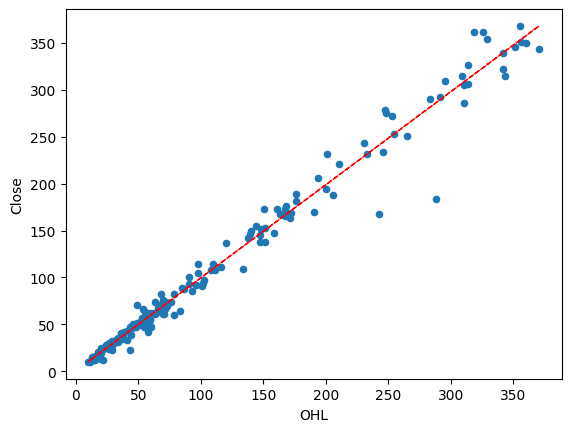

In [282]:
yes_bank.plot.scatter(x='OHL',y='Close')


z = np.polyfit(yes_bank['OHL'], yes_bank['Close'], 1)
y = np.poly1d(z)(yes_bank['OHL'])
plt.plot(yes_bank['OHL'], y, 'r--', lw=1)
plt.show()

In [283]:
#function for splitting time-series data into training and testing datasets
def timeseries_train_and_test(X, y, testsize=0.2):

    test_index = int(len(X)*(1-testsize))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, y_train, X_test, y_test

In [284]:
X = yes_bank.dropna().drop(['Open', 'High', 'Low', 'Close'], axis=1)
y = yes_bank.dropna()['Close']

X_train, y_train, X_test, y_test = timeseries_train_and_test(X, y, testsize=0.2)

In [285]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [286]:
predictions = lr.predict(X_test)

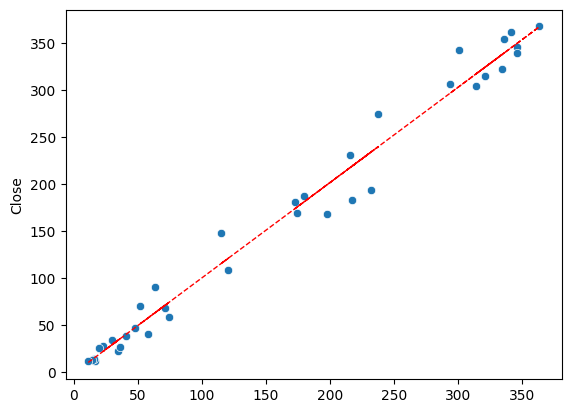

In [287]:
sns.scatterplot(x=predictions, y=y_test)

z = np.polyfit(predictions, y_test, 1)
y = np.poly1d(z)(predictions)
plt.plot(predictions, y, 'r--', lw=1)
plt.show()

In [288]:
from sklearn.metrics import (r2_score, mean_absolute_error,
                             mean_squared_error)

print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'R2 Score: {r2_score(y_test, predictions)}')

MAE: 13.39584827615667
MSE: 320.9463623272361
RMSE: 17.914975923155357
R2 Score: 0.9802999963130272


In [289]:
new_yes_bank['Next Month'] = new_yes_bank['Close'].shift(-1)
new_yes_bank['Target'] = (new_yes_bank['Next Month'] > new_yes_bank['Close']).astype(int)

In [290]:
new_X = new_yes_bank[['Open', 'High', 'Low']]
new_y = new_yes_bank['Close']

new_X_train, new_y_train, new_X_test, new_y_test = \
    timeseries_train_and_test(new_X, new_y, testsize=0.3)

In [291]:
logi_X = new_yes_bank[['Open', 'High', 'Low', 'Close']]
logi_y = new_yes_bank['Target']

logi_X_train, logi_y_train, logi_X_test, logi_y_test = \
    timeseries_train_and_test(logi_X, logi_y, testsize=0.3)

In [292]:
lr2 = LinearRegression()
lr2.fit(new_X_train, new_y_train)

LinearRegression()

In [293]:
new_predictions = lr2.predict(new_X_test)

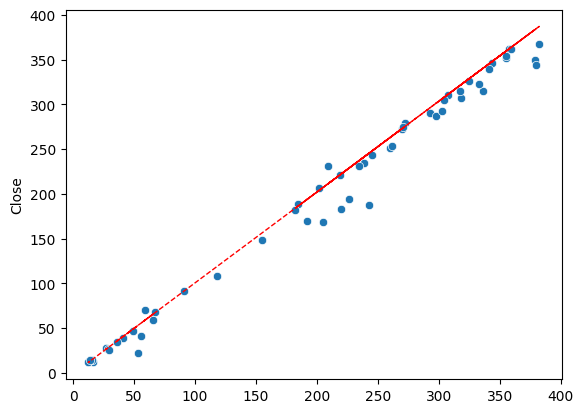

In [294]:
sns.scatterplot(x=new_predictions, y=new_y_test)

new_z = np.polyfit(new_predictions, new_y_test, 1)
new_y = np.poly1d(z)(new_predictions)
plt.plot(new_predictions, new_y, 'r--', lw=1)
plt.show()

In [295]:
print(f'MAE: {mean_absolute_error(new_y_test, new_predictions)}')
print(f'MSE: {mean_squared_error(new_y_test, new_predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(new_y_test, new_predictions))}')
print(f'R2 Score: {r2_score(new_y_test, new_predictions)}')

MAE: 9.424602964278815
MSE: 231.12789809242977
RMSE: 15.202891109668245
R2 Score: 0.9844475561440282


In [296]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
model.fit(new_X_train, new_y_train)

Lasso()

In [297]:
lasso_predictions = model.predict(new_X_test)

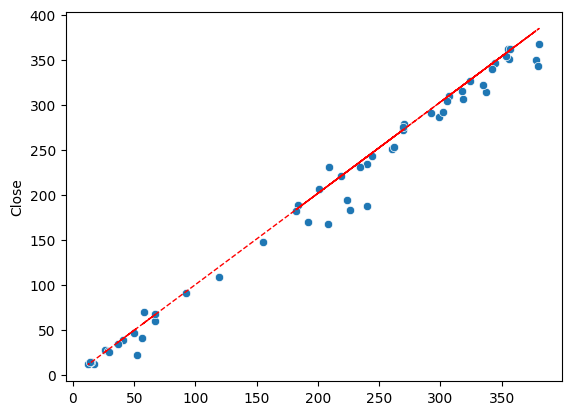

In [298]:
sns.scatterplot(x=lasso_predictions, y=new_y_test)

new_z = np.polyfit(lasso_predictions, new_y_test, 1)
new_y = np.poly1d(z)(lasso_predictions)
plt.plot(lasso_predictions, new_y, 'r--', lw=1)
plt.show()

In [299]:
print(f'MAE: {mean_absolute_error(new_y_test, lasso_predictions)}')
print(f'MSE: {mean_squared_error(new_y_test, lasso_predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(new_y_test, lasso_predictions))}')
print(f'R2 Score: {r2_score(new_y_test, lasso_predictions)}')

MAE: 9.800467301471729
MSE: 237.9326002364829
RMSE: 15.425064026981635
R2 Score: 0.983989672223803


In [300]:
model_2 = Lasso(alpha=1.0)
model_2.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+02, tolerance: 1.015e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [301]:
lasso_predictions_old = model_2.predict(X_test)

In [302]:
print(f'MAE: {mean_absolute_error(y_test, lasso_predictions_old)}')
print(f'MSE: {mean_squared_error(y_test, lasso_predictions_old)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, lasso_predictions_old))}')
print(f'R2 Score: {r2_score(y_test, lasso_predictions_old)}')

MAE: 13.538357069494266
MSE: 323.19107023598133
RMSE: 17.977515685877773
R2 Score: 0.980162213931704


In [303]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()
logi.fit(logi_X_train, logi_y_train)

LogisticRegression()

In [304]:
logi_predictions = logi.predict(logi_X_test)

In [305]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix: ')
print(confusion_matrix(logi_y_test, logi_predictions))

Confusion Matrix: 
[[10 22]
 [11 13]]


<AxesSubplot: >

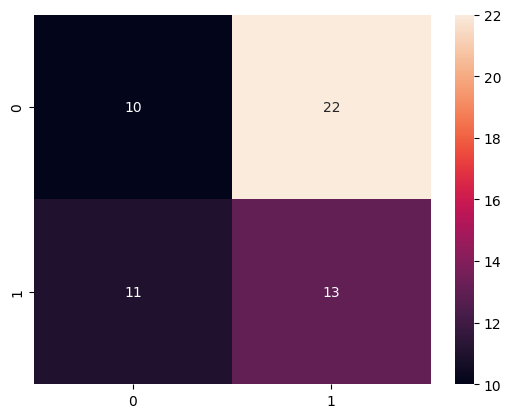

In [306]:
sns.heatmap(confusion_matrix(logi_y_test, logi_predictions), annot=True)

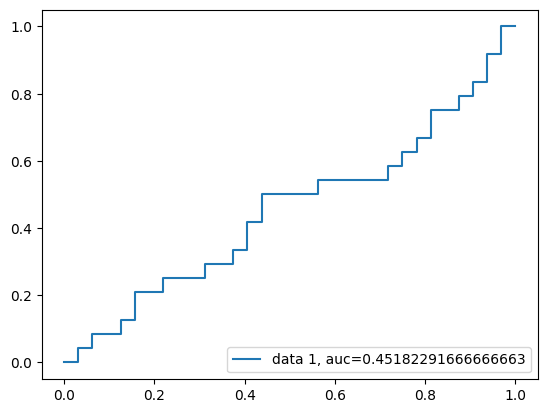

In [307]:
from sklearn import metrics

y_pred_proba = logi.predict_proba(logi_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(logi_y_test,  y_pred_proba)
auc = metrics.roc_auc_score(logi_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [325]:
X_some = yes_bank.dropna()[['OHL']]
y_some = yes_bank.dropna()['Close']

X_train_some, y_train_some, X_test_some, y_test_some = \
    timeseries_train_and_test(X_some, y_some, testsize=0.2)

X_train_some.tail()

,OHL
Date,
2017-06-01,291.07
2017-07-01,318.61
2017-08-01,356.30
2017-09-01,359.92
2017-10-01,343.12


In [321]:
lr_some = LinearRegression()
lr_some.fit(X_train_some, y_train_some)

LinearRegression()

In [322]:
some_predictions = lr_some.predict(X_test_some)

In [323]:
print(f'MAE: {mean_absolute_error(y_test_some, some_predictions)}')
print(f'MSE: {mean_squared_error(y_test_some, some_predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_some, some_predictions))}')
print(f'R2 Score: {r2_score(y_test_some, some_predictions)}')

MAE: 17.31830685728956
MSE: 734.109263999011
RMSE: 27.094450797146838
R2 Score: 0.9549396506551582
